# Visualizing Gradient Descent

_Note: This notebook was based on `lesson2-sgd` notebook._

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

Next, we develop a way using Matplotlib to visualize gradient descent. You will get an opportunity to learn a little bit more on Matplotlib as well. Happy learning!

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Linear Regression Problem

In [2]:
n = 100

In [3]:
x = torch.ones(n, 2)
x[:,0].uniform_(-1., 1)
x[:5]

tensor([[-0.3953,  1.0000],
        [-0.3688,  1.0000],
        [-0.3732,  1.0000],
        [-0.4507,  1.0000],
        [ 0.4685,  1.0000]])

In [4]:
a = torch.tensor([3., 2])
a

tensor([3., 2.])

In [5]:
y = x@a + torch.rand(n)

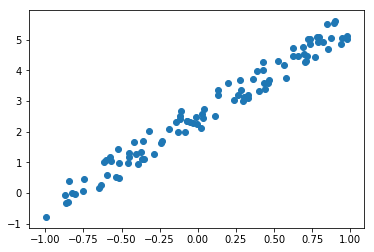

In [6]:
plt.scatter(x[:,0], y);

In [7]:
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

## Plot the loss function as 3D mesh

We will use [Matplotlib toolkits](https://matplotlib.org/mpl_toolkits/index.html). Toolkits are collections of application-specific functions that extend Matplotlib. `mplot3d` provides some basic 3D plotting tools.

In [8]:
from mpl_toolkits import mplot3d

In [9]:
def loss_wrt_wgts(w1, w2):
    w = torch.Tensor([w1, w2])
    y_hat = x@w
    return mse(y_hat, y)

In [10]:
# Define a vectorized function
loss_wgts = np.vectorize(loss_wrt_wgts)

In [11]:
w0_range = np.linspace(-20, 20, 50)
w1_range = np.linspace(-20, 20, 50)
mesh = np.meshgrid(w0_range, w1_range)
loss_mesh = loss_wgts(*mesh)

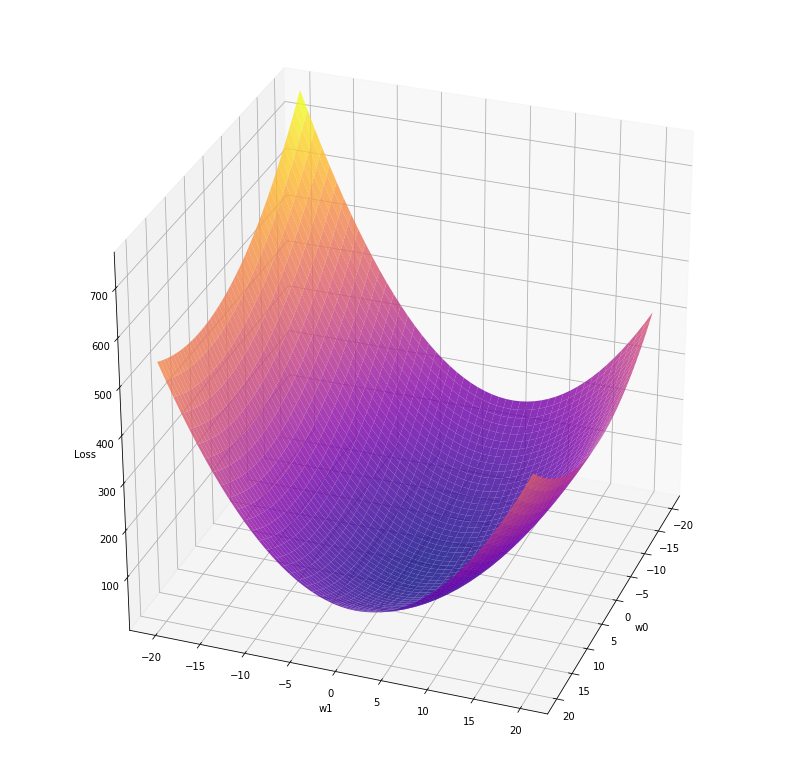

In [26]:
fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')
ax.plot_surface(*mesh, loss_mesh, cmap='plasma', alpha=0.8) # plasma color map
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss')
ax.view_init(30, 20)

## Gradient descent

In [13]:
def update(w):
    y_hat = x@w
    loss = mse(y, y_hat)
    prev_wgts = w.data.clone()   
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        w.grad.zero_()
    return prev_wgts, loss.item()

In [14]:
def train(w0):
    recorder = []
    w = torch.tensor(w0, requires_grad=True)
    for t in range(n_epochs): recorder.append(update(w))
    rec_wgts, rec_loss = [list(o) for o in zip(*recorder)]
    rec_wgts = torch.stack(rec_wgts)
    return rec_wgts, rec_loss

In [15]:
# hyper parameters
lr = 0.1
n_epochs = 100

# initial parameters (weights)
w0 = [-18., -18.]

rec_wgts, rec_loss = train(w0)

In [16]:
print(rec_wgts[:10])
print(rec_loss[:10])

tensor([[-18.0000, -18.0000],
        [-16.3495, -13.5613],
        [-14.8747, -10.0371],
        [-13.5497,  -7.2417],
        [-12.3533,  -5.0269],
        [-11.2681,  -3.2745],
        [-10.2794,  -1.8902],
        [ -9.3752,  -0.7988],
        [ -8.5456,   0.0596],
        [ -7.7820,   0.7329]])
[628.0216674804688, 425.50238037109375, 293.49993896484375, 206.76918029785156, 149.18788146972656, 110.44976806640625, 83.9574966430664, 65.4800033569336, 52.29692459106445, 42.65311050415039]


## Animate it!

Let's now take a look at this as an animation. This is one of the nice things that you can do with Matplotlib. You can take any plot and turn it into an animation. So you can now actually see it updating each step.

In [27]:
from matplotlib import animation
from matplotlib.gridspec import GridSpec
plt.rc('animation', html='html5')

If you experience "RuntimeError: Requested MovieWriter (ffmpeg) not available".

_You may need to uncomment the following to install the necessary plugin the first time you run this:_

_(after you run following commands, make sure to restart the kernel for this notebook)_

_If you are running in Google Colab, the installs are not needed; just change the cell above to be ... html='jshtml' instead of ... html='html5'_

In [ ]:
# ! sudo add-apt-repository -y ppa:mc3man/trusty-media
# ! sudo apt-get update -y
# ! sudo apt-get install -y ffmpeg
# ! sudo apt-get install -y frei0r-plugins

Plot location of subplot using [GridSpec](https://www.scipy-lectures.org/intro/matplotlib/auto_examples/plot_gridspec.html).

In [52]:
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

<Figure size 1008x576 with 0 Axes>

Plot ground truth and model:

In [53]:
ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(x[:,0], y, c='green', label='Ground truth')
ax0.set_ylim(-1, 6)
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

Plot loss:

In [54]:
ax1 = fig.add_subplot(gs[:,1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(*mesh, loss_mesh, cmap='plasma', alpha=0.8)
ax1.plot3D([a[0]], [a[1]], [0], c='black', marker='x', markersize=10, 
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='black', marker='o', alpha=0.4, label='loss')
ax1.set_xlabel('w0'); ax1.set_ylabel('w1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend()

Plot weights and loss:

In [55]:
ax2 = fig.add_subplot(gs[1,0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([],[], label='w0')
line3, = ax2.plot([],[], label='w1')
ax2.set_ylim(-20, 5)
ax2.set_xlim(0, n_epochs)
ax2.set_xlabel('epochs')
ax2.set_ylabel('weights')

ax3 = ax2.twinx()
line4, = ax3.plot([],[], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 500)

In [56]:
ax2.legend((line2, line3, line4), ('w0', 'w1', 'loss'), loc='center right')

The main plot

In [57]:
ttl = fig.suptitle(f'lr: {lr} - Epoch: 0/{n_epochs}', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

In [58]:
def animate(i):   
    line0.set_data(x[:,0].numpy(), (x@rec_wgts[i]).numpy())
    line1.set_data(rec_wgts[:i+1,0].numpy(), rec_wgts[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_wgts[:i+1, 0].numpy())
    line3.set_data(epochs, rec_wgts[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'lr: {lr} - Epoch: {i+1}/{n_epochs}')
    return line0, line1, line2, line3, line4, ttl

In [59]:
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

## Visualizing different learning rates

In [60]:
lr = 0.01
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

In [61]:
lr = 0.7
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

In [62]:
lr = 0.99
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)

In [63]:
lr = 1.01
rec_wgts, rec_loss = train(w0)
animation.FuncAnimation(fig, animate, range(n_epochs), interval=40)